# By- Somya Agarwal

# Data Science and Business Analytics Task - TSF GRIP

## Task-1: Prediction using Supervised Machine Learning

### Aim: Predict the percentage of a student based on the number of hours of study

## Import required libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import statement to split the dataset
from sklearn.model_selection import train_test_split
#import the model
from sklearn.linear_model import LinearRegression
#import the performance evaluation metrics
from sklearn.metrics import mean_squared_error as MSE

## Read data

In [2]:
#read the data from the given url
link = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(link)

#First few rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Explore the dataset

In [3]:
#dimensions of the dataset
#(rows, columns)
df.shape

(25, 2)

In [4]:
#check for empty values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#check for duplicated values
df.duplicated().sum()

0

In [6]:
#Basic statistical analysis
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Since, the data doesn't have any empty or duplicated values, and consists of only continuous features, the data is ready for machine learning models.

## Visualize the data

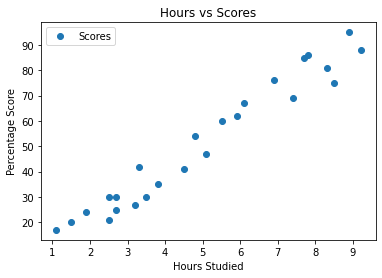

In [7]:
#Plot the distribution of hours vs scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### From the graph, it can be clearly observed that 'hours' and 'scores' have a positive linear relationship. Hence, it is a simple linear regression task.

## Split the data

In [8]:
#prepare the data
#divide the data into X(inputs) and y(labels)
X = df.iloc[:,:-1]
y = df.iloc[:,1]

In [9]:
#split the data into training and test sets
#test_size decides the proportion of division
#0.2 for this case, which means
#80% data is in training set and 20# in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train the model

In [10]:
linReg = LinearRegression()
#fit the model
linReg.fit(X_train, y_train)
print('Training Completed!!')

Training Completed!!


### Regression line is a single line that best fits the data (in terms of overall smallest distance between the data points and the line). The formula for best fit line is y = mx + b, where m is the slope and b is the y-intercept. The linear regression model calculate the slope and intercept for us that can be accessed from linReg.coef_ and linReg.intercept_ respectively.

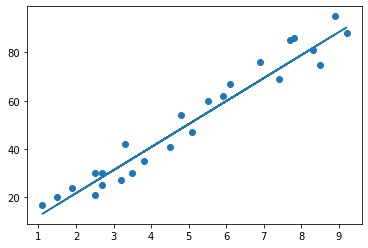

In [11]:
#form the regression line
regLine = linReg.coef_* X + linReg.intercept_
#plot the regression line
plt.scatter(X,y, marker='o')
plt.plot(X, regLine)

## Make predictions

In [12]:
y_pred = linReg.predict(X_test)
#form a dataframe of actual and predicted values
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction.head()

,Actual,Predicted
20,30,28.382053
17,24,20.750644
15,95,87.525477
18,67,60.815544
23,76,68.446953


### Note: (.predict) accepts values with the same dimensions as the training set, hence we need to convert our input accordingly. 

In [13]:
#convert input to match with the 
#dimensions of training set as follows:
hrs = [[9.25]]
#make predictions
percentage = linReg.predict(hrs)
print('Number of hours: '+ str(hrs[0][0]))
print('Predicted score {}%: '.format(round(percentage[0],2)))

Number of hours: 9.25
Predicted score 90.86%: 


## Evaluate the performance

### To evaluate the performance of the model, mean squared error is used. It calculates the mean of squared difference between the estimated values and the real value.

In [14]:
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 5.7330720207172465


## Conclusion: The mean squared error of the model is , which is about 10% percent of mean of percentage scores. Hence, the model is performing decently. 